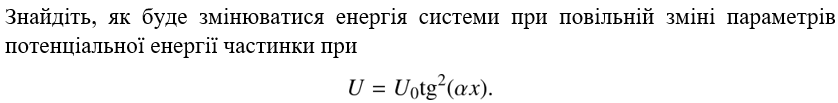

In [1]:
from IPython.display import display, Math, Latex

def disp(ex):
    display(Math(latex(ex)))

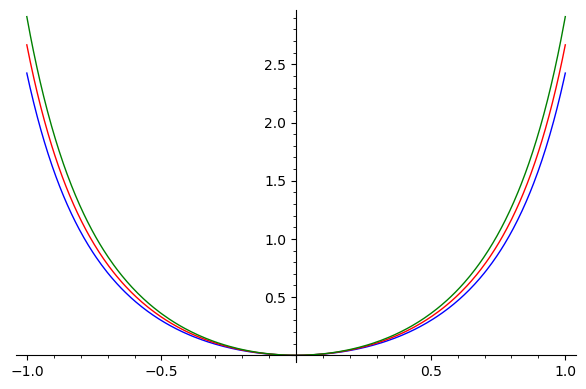

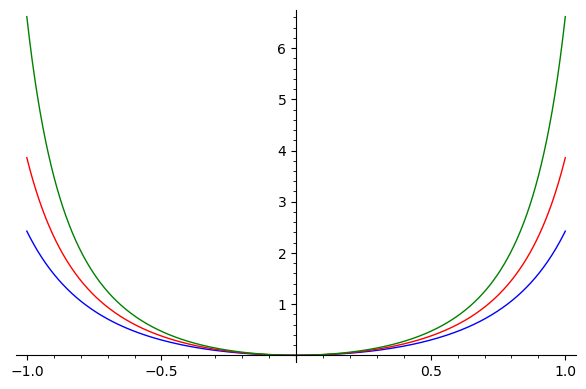

In [2]:
# Объявление переменных и функций

U_0 = var("U_0")
m,t = var("m,t")

V = var("v")
v = function("v")(t)

X = var("x")
x = function("x")(t)

P = var("p")
p = function("p")(t)

Alpha = var("alpha")
alpha = function("alpha")(t)

In [3]:
# Кинетическая энергия в координатах x

Tx = (1/2) * m*((x.diff(t))^2)
disp(Tx)

<IPython.core.display.Math object>

In [4]:
# Кинетическая энергия в координатах p

Tp = (1/2) * ((P)^2) / m
disp(Tp)

<IPython.core.display.Math object>

In [5]:
# уравнения замены производных обобщенных координат на v

subs_to_v      = [x.diff(t) == V]
subs_to_v_func = [x.diff(t) == v]

In [6]:
# уравнения замены производных обобщенных координат на p

subs_to_p      = [x.diff(t) == P/m]
subs_to_p_func = [x.diff(t) == p/m]

In [57]:
# Потенциальная энергия в координатах x

U = U_0 * tan(alpha * x)^2
# U = U_0 * alpha * x^2

disp(U)

<IPython.core.display.Math object>

In [58]:
# производная потенциальной энергии по координате
dUdX = diff(U.subs(x == X), X)
disp(dUdX)

<IPython.core.display.Math object>

In [59]:
# находим точку минимума потенциальной энергии
# приравнивая первую производную потенциальной энергии нулю

eq = dUdX.subs(alpha == Alpha) == 0
disp(eq)
disp(eq.lhs().operands())
# disp(solve (eq, X))
U_min = []
for operand in eq.lhs().operands():
    U_min += solve (operand == 0, X)
disp(U_min)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [60]:
# координата минимума потенциальной энергии
X_U_min = X.subs(U_min)
X_U_min

0

In [61]:
# производная потенциальной энергии по координате
# в точке минимума потенциальной энергии
disp(dUdX.subs(U_min))

<IPython.core.display.Math object>

In [62]:
# вторая производная потенциальной энергии по координате
# в точке минимума потенциальной энергии
d2UdX2 = diff(U.subs(x == X), X, 2)
disp(d2UdX2)
disp(d2UdX2.subs(U_min))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [63]:
# Процедура линеаризации
# разложение потенциальной энергии в Ряд Тейлора до второго порядка
# относительно координаты минимума потенциальной энергии
U_tailor_2 = dUdX.subs(U_min) * (X - X_U_min)^1 / 1 \
           + d2UdX2.subs(U_min) * (X - X_U_min)^2 / 2
disp(U_tailor_2)

<IPython.core.display.Math object>

In [64]:
# Лагранжиан в Ряд Тейлора
L_tailor_2 = Tx - U_tailor_2
disp(L_tailor_2)

# в Лагранжиане производим замену производных обобщенных координат на v
L_tailor_2 = L_tailor_2.subs(x.diff(t) == V).subs(alpha == Alpha)
disp(L_tailor_2)

# Найдем обобщенные импульсы
P1_tailor_2 = L_tailor_2.diff(V).subs(V == v)
disp(P1_tailor_2)

# Найдем обобщенные силы
F1_tailor_2 = L_tailor_2.subs(x == X).diff(X).subs(X == x)
disp(F1_tailor_2)

# Запишем уравнения Эйлера-Лагранжа
de1_tailor_2 = P1_tailor_2.diff(t) - F1_tailor_2 == 0
disp(de1_tailor_2)

de1_tailor_2 = de1_tailor_2.substitute_function(v == x.diff(t))
disp(de1_tailor_2)

assume(U_0>0)
assume(Alpha>0)
assume(m>0)
sol_tailor_2 = desolve(de1_tailor_2, x, ivar=t, algorithm='maxima')
disp(sol_tailor_2)

sol_tailor_2_fricas = desolve(de1_tailor_2, x, ivar=t, algorithm='fricas')
disp(sol_tailor_2_fricas)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [65]:
# Лагранжиан

L = Tx - U
disp(L)

<IPython.core.display.Math object>

In [66]:
# Гамильтониан

H = Tp + U
disp(H)

<IPython.core.display.Math object>

In [67]:
# в Лагранжиане производим замену производных обобщенных координат на v

L = L.subs(subs_to_v)
disp(L)

<IPython.core.display.Math object>

Найдем обобщенные импульсы

$P = \frac{\partial L}{\partial \dot{x}} = \frac{\partial L}{\partial {v}}$

In [68]:
P1 = L.diff(V).subs(V == v)
disp(P1)

<IPython.core.display.Math object>

Найдем обобщенные силы

$\frac{\partial L}{\partial {x}} = F$

In [69]:
F1 = L.subs(x == X).diff(X).subs(X == x)
disp(F1)

<IPython.core.display.Math object>

Запишем уравнения Эйлера-Лагранжа

$\frac{d}{dt}\frac{\partial L}{\partial \dot{x}} - \frac{\partial L}{\partial {x}} = 0$

In [70]:
de1 = P1.diff(t) - F1 == 0
disp(de1)

<IPython.core.display.Math object>

In [71]:
disp(de1.full_simplify().expand())

<IPython.core.display.Math object>

Выразим энергию через Лагранжиан

$E = \Sigma_{i}^{} \frac {\partial L}{\partial \dot{q}_i} \frac {q_i}{dt} - L$

In [72]:
E = P1 * v - L
disp (E)

<IPython.core.display.Math object>

# Поиск периода колебаний

In [73]:
# Запишем дифференциальное уравнение выражающее закон сохранения энергии

de_E = (P1 * v - L).subs(V == v, alpha == Alpha).substitute_function(v == x.diff(t)) == var("E")
disp(de_E)

<IPython.core.display.Math object>

In [74]:
# выражаем производную координаты по времени через энергию
# подготавливаем полученное дифференциальное уравнение к дифференцированию

sol_dxdt_E = solve(de_E, x.diff(t))
disp(sol_dxdt_E)

<IPython.core.display.Math object>

Разделяя переменные интегрируем полученное выражение по координате 
от минимальной координаты до максимальной
получаем выражение для периода колебаний

Максимальная и минимальная координата находятся из условия равенства полной энергии потенциальной энергии или равенства кинетической энергии нулю

In [75]:
# уравнение в котором приравниваем полную энергию E потенциальной энергии

eq_E_U = var("E") == (P1 * V - L).subs(v == V, alpha == Alpha).subs(V == 0).subs(x == X)
disp(eq_E_U)

<IPython.core.display.Math object>

In [76]:
# решая его получаем точки, в котором потенциальная энергия равна полной

sol_x_E = solve(eq_E_U, X)
disp(sol_x_E)

<IPython.core.display.Math object>

In [77]:
# разделяем переменные в дифференциальном уравнении
# выражающем закон сохранения энергии
# получаем интегранд при dx
dx_integrand = 1/sol_dxdt_E[0].rhs().subs(x == X)
disp(dx_integrand)

<IPython.core.display.Math object>

In [107]:
# интегрируем интегранд при dx по иксу
assume(E>0)

t_integral_maxima = dx_integrand.integrate(X, algorithm = "maxima")
#disp(t_integral_maxima)
t_integral_maxima

-1/2*sqrt(E + U_0)*sqrt(m)*(arctan2(1/2*(E*U_0*(((E^4 + 4*E^3*U_0 + 6*E^2*U_0^2 + 4*E*U_0^3 + U_0^4)*cos(2*alpha*x)^4 + (E^4 + 4*E^3*U_0 + 6*E^2*U_0^2 + 4*E*U_0^3 + U_0^4)*sin(2*alpha*x)^4 + E^4 + 4*E^3*U_0 + 6*E^2*U_0^2 + 4*E*U_0^3 + U_0^4 + 4*(E^4 + 2*E^3*U_0 - 2*E*U_0^3 - U_0^4)*cos(2*alpha*x)^3 + 2*(3*E^4 + 4*E^3*U_0 + 2*E^2*U_0^2 + 4*E*U_0^3 + 3*U_0^4)*cos(2*alpha*x)^2 + 2*(E^4 - 4*E^3*U_0 - 10*E^2*U_0^2 - 4*E*U_0^3 + U_0^4 + (E^4 + 4*E^3*U_0 + 6*E^2*U_0^2 + 4*E*U_0^3 + U_0^4)*cos(2*alpha*x)^2 + 2*(E^4 + 2*E^3*U_0 - 2*E*U_0^3 - U_0^4)*cos(2*alpha*x))*sin(2*alpha*x)^2 + 4*(E^4 + 2*E^3*U_0 - 2*E*U_0^3 - U_0^4)*cos(2*alpha*x))/(E^2*U_0^2))^(1/4)*sin(1/2*arctan2(1/2*(E^2 - U_0^2 + (E^2 + 2*E*U_0 + U_0^2)*cos(2*alpha*x))*sin(2*alpha*x)/(E*U_0), 1/4*((E^2 + 2*E*U_0 + U_0^2)*cos(2*alpha*x)^2 - (E^2 + 2*E*U_0 + U_0^2)*sin(2*alpha*x)^2 + E^2 + 2*E*U_0 + U_0^2 + 2*(E^2 - U_0^2)*cos(2*alpha*x))/(E*U_0))) + sqrt(E*U_0)*(E + U_0)*sin(2*alpha*x))/(E*U_0), 1/2*(E*U_0*(((E^4 + 4*E^3*U_0 + 6*E^2*U

In [105]:
# в неопределённый интеграл подставляем нижний предел интегрирования
t_integral_maxima_down = t_integral_maxima.subs(sol_x_E[0])
#disp(t_integral_maxima_down)

In [103]:
# в неопределённый интеграл подставляем нижний предел интегрирования
t_integral_maxima_up = t_integral_maxima.subs(sol_x_E[1])
#disp(t_integral_maxima_up)

In [104]:
T_integral_maxima = t_integral_maxima_up - t_integral_maxima_down
#disp(T_integral_maxima)

In [94]:
# интегрируем интегранд при dx по иксу
t_integral_fricas = dx_integrand.integrate(X, algorithm = "fricas")
disp(t_integral_fricas[0])
disp(t_integral_fricas[1])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [108]:
# полученный неопределённый интеграл дифференцируем
# для проверки правильности дифференцирования
disp(t_integral_fricas[0].diff(X))

<IPython.core.display.Math object>

In [96]:
# полученный неопределённый интеграл дифференцируем
# для проверки правильности дифференцирования
disp(t_integral_fricas[1].diff(X).full_simplify())

<IPython.core.display.Math object>

In [97]:
# в неопределённый интеграл подставляем нижний предел интегрирования
t_integral_fricas_0_down = t_integral_fricas[0].subs(sol_x_E[0])
disp(t_integral_fricas_0_down)
disp(t_integral_fricas_0_down.full_simplify())

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [99]:
# в неопределённый интеграл подставляем верхний предел интегрирования
t_integral_fricas_0_up = t_integral_fricas[0].subs(sol_x_E[1])
disp(t_integral_fricas_0_up)
disp(t_integral_fricas_0_up.full_simplify())

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [98]:
# в неопределённый интеграл подставляем нижний предел интегрирования
t_integral_fricas_1_down = t_integral_fricas[1].subs(sol_x_E[0])
disp(t_integral_fricas_1_down)
disp(t_integral_fricas_1_down.full_simplify())

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [100]:
# в неопределённый интеграл подставляем верхний предел интегрирования
t_integral_fricas_1_up = t_integral_fricas[1].subs(sol_x_E[1])
disp(t_integral_fricas_1_up)
disp(t_integral_fricas_1_up.full_simplify())

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [101]:
T_integral_fricas_0 = t_integral_fricas_0_up - t_integral_fricas_0_down
T_integral_fricas_0.full_simplify()

0

In [102]:
T_integral_fricas_1 = t_integral_fricas_1_up - t_integral_fricas_1_down
T_integral_fricas_1.full_simplify()

0

# Интегрировние уравнений Гамильтона

In [122]:
# Объявление переменных - обобщенные импульсы

p_1, p_2 = var ("p_1, p_2")

In [123]:
# Записываем уравнения выражающие обобщенные импульсы
# через производные Лагранжиана по скорости изменения обобщенной координаты (по v)

eq_p_v = [p_1 == L.diff(V)]
disp(eq_p_v[0])

<IPython.core.display.Math object>

In [124]:
# Ищем выражение для omega через обобщенные импульсы, решая вышесозданную систему уравнений

sol_v_p = solve(eq_p_v, [V])
disp(sol_v_p)

<IPython.core.display.Math object>

In [125]:
# Находим выражение для Гамильтониана исходя из
# выражения энергии через Лагранжиан
# используя вышенайденную подстановку, выражающую omega через обобщенные импульсы и координаты

H = (p_1 * V - L).subs(sol_v_p).subs(x == X)
disp(H)

<IPython.core.display.Math object>

Записываем уравнения Гамильтона

$\dot{p}_i = - \frac{\partial H}{\partial q_i}$

$\dot{q}_i = \frac{\partial H}{\partial p_i}$

In [126]:
dot_p1 = - H.diff(X)
dot_x1 =   H.diff(p_1)

In [127]:
disp(dot_p1)

<IPython.core.display.Math object>

In [128]:
disp(dot_x1)

<IPython.core.display.Math object>

In [129]:
# полученные уравнения Гамильтона обьединяем в систему из 2 уравнений
des = [dot_p1, dot_x1]
disp(des)

<IPython.core.display.Math object>

In [130]:
alpha_subs = alpha == 1 + 0.1 * t
alpha_subs

alpha(t) == 0.100000000000000*t + 1

In [131]:
values = [U_0 == 1, m == 1, alpha_subs]
values

[U_0 == 1, m == 1, alpha(t) == 0.100000000000000*t + 1]

In [132]:
H_subs = H.subs(values)
H_subs

(0.100000000000000*t + 1)*x^2 + 1/2*p_1^2

In [133]:
# в которой делаем подстановку численных значений масс, длин и ускорения свободного падения
f = [de_i.subs(values) for de_i in des]
disp(f)

<IPython.core.display.Math object>

In [134]:
# Solve numerically a system of first-order ordinary differential equations
# using odeint from scipy.integrate module.

# des – right hand sides of the system
# ics – initial conditions
# times – a sequence of time points in which the solution must be found
# dvars – dependent variables. ATTENTION: the order must be the same as in des, that means: d(dvars[i])/dt=des[i]
# ivar – independent variable, optional.

times = srange(0, 4.4, 0.01)

x0 = 0.1

sol = desolve_odeint(des=f, ics=[0,x0], times=times, dvars=[p_1, X], ivar=t)

# Построение фазовых диаграмм ($v(p)$)

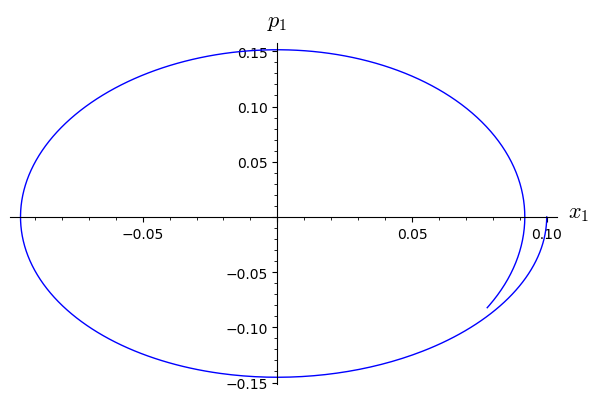

In [135]:
p = line(zip(sol[:,1],sol[:,0]), axes_labels=['$x_1$','$p_1$',])
p.show()

# Построение зависимости обобщённых координат и импульсов от времени

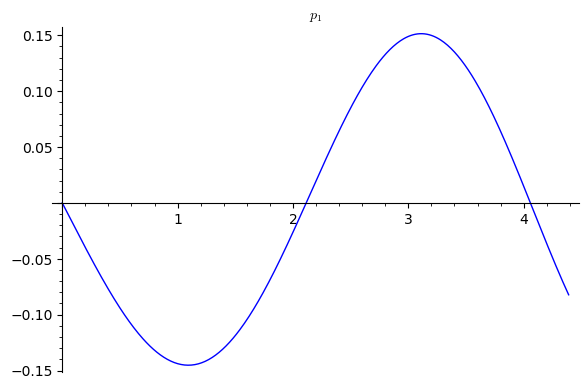

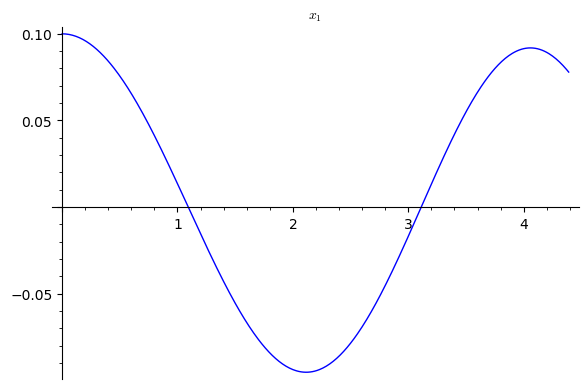

In [136]:
p = line(zip(times,sol[:,0]))
p.show(title="$p_1$")

p = line(zip(times,sol[:,1]))
p.show(title="$x_1$")

In [137]:
def make_energy_plot():
    previose_x_value = x0
    previose_phi_value = 0
    H_t = []
    phi_t = [] # фаза процесса - отношение текущего импульса к координате
    phi2_t = [] # фаза процесса - отношение текущего импульса к координате
    phi_cycles = 0
    
    omega_t = []
    
    integral = 0
    integrals_t = []
    
    for t_value, [p_value, x_value] in zip(times,sol):
        H_value = H_subs.subs(p_1 == p_value, X == x_value, t = t_value).n()
        phi_value = atan2(p_value, x_value)
        
        H_t += [[t_value, H_value]]
        phi_t += [[t_value, phi_value]]
        delta_phi = phi_value - previose_phi_value
        delta_x = x_value - previose_x_value

        integral += delta_x * p_value 

        if abs(delta_phi) >= pi:
            phi_cycles -= 2* pi

        phi2_t += [[t_value, phi_value+phi_cycles]]

        if abs(delta_phi) <= pi and phi_value * previose_phi_value < 0:
            integrals_t += [[t_value, integral]]
            integral = 0

            omega_value = (phi_value+phi_cycles) / t_value
            omega_t += [[t_value, omega_value]]

        previose_phi_value = phi_value
        previose_x_value = x_value

    p = line(H_t)
    p.show(title="$энергия\\,процесса$")

    #p = line(phi_t)
    #p.show(title="$фаза\\,процесса$")

    #p = line(phi2_t)
    #p.show(title="$фаза\\,процесса$")
    
    p = line(omega_t)
    p.show(title="$частота\\,процесса$")
    
    p = line(integrals_t)
    p.show(title="$адиабатический\\,инвариант\\,процесса$")
    
    return integrals_t

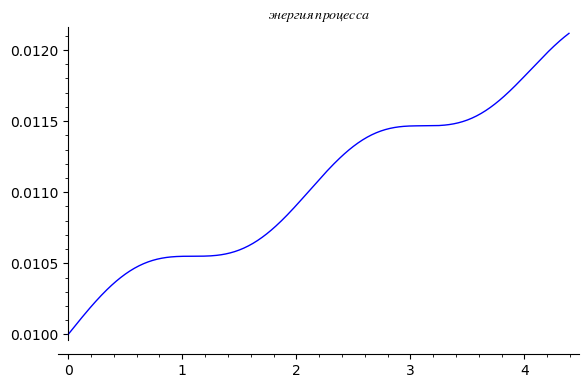

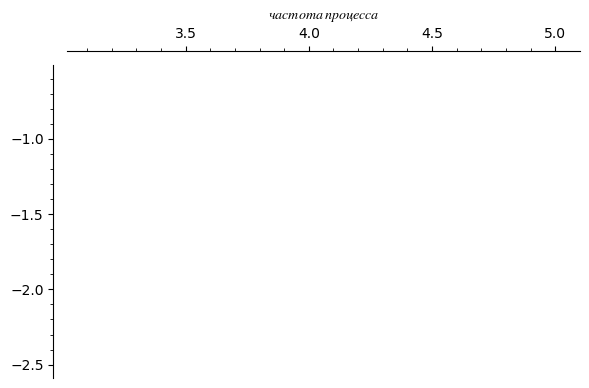

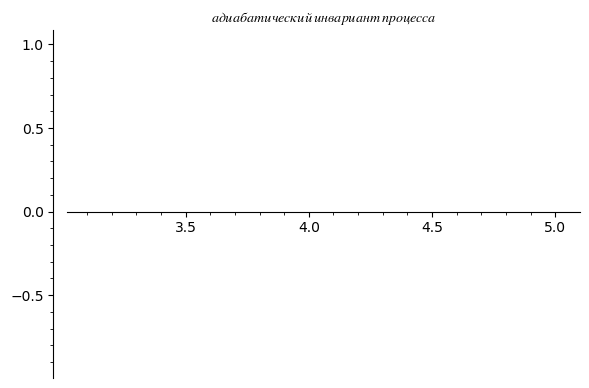

[[4.05999999999996, 0.04453210506439325]]

In [138]:
make_energy_plot()

In [139]:
times = srange(0, 48.01, 0.001)

sol = desolve_odeint(des=f, ics=[0,x0], times=times, dvars=[p_1, X], ivar=t)

# Построение фазовых диаграмм ($v(p)$)

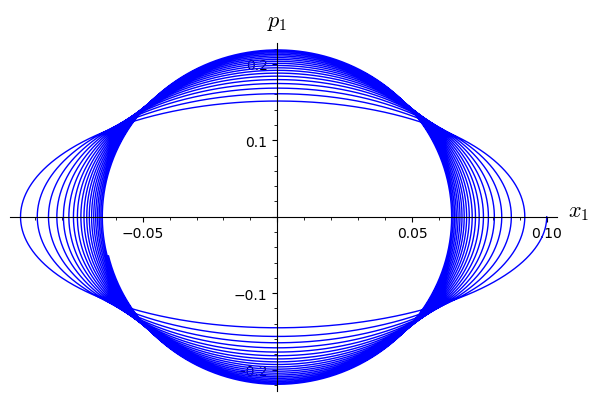

In [140]:
p = line(zip(sol[:,1],sol[:,0]), axes_labels=['$x_1$','$p_1$',])
p.show()

# Построение зависимости обобщённых координат и импульсов от времени

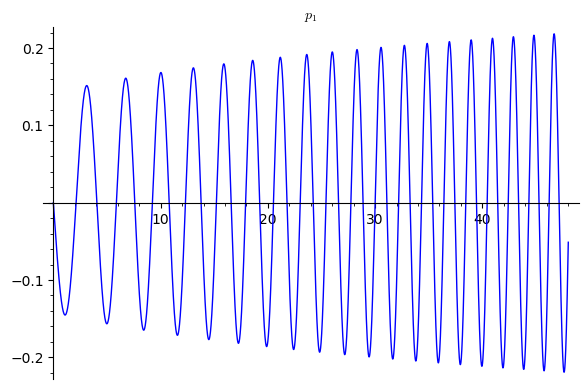

In [141]:
p = line(zip(times,sol[:,0]))
p.show(title="$p_1$")

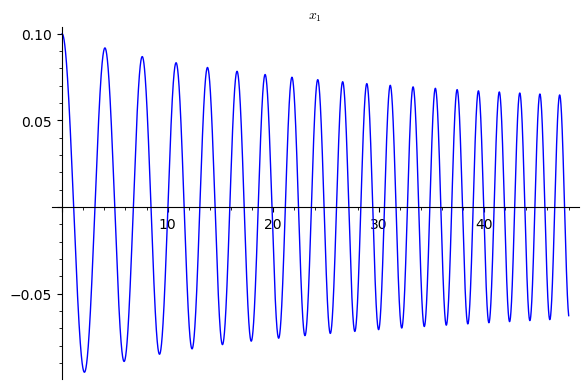

In [142]:
p = line(zip(times,sol[:,1]))
p.show(title="$x_1$")

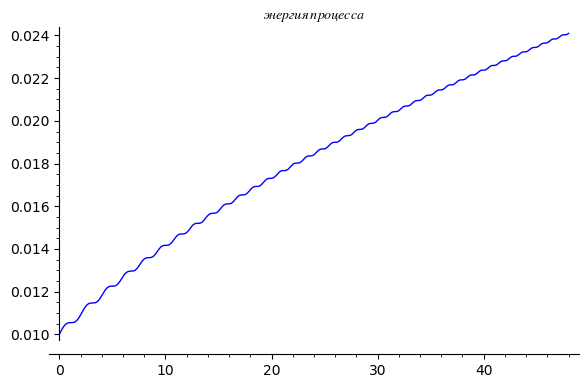

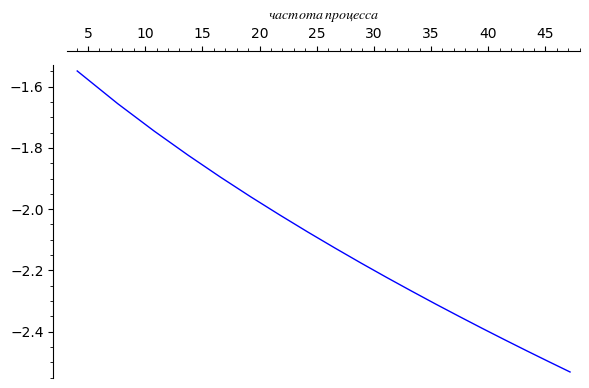

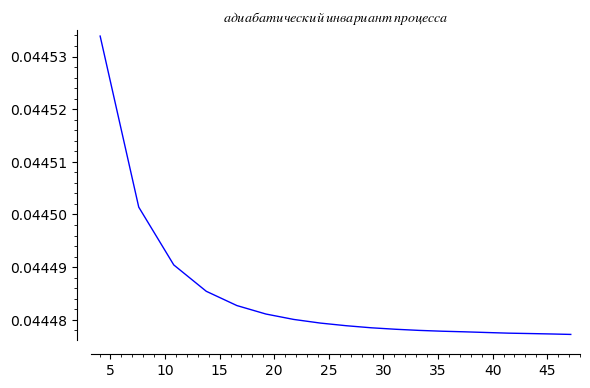

[[4.05899999999969, 0.044533879147628366],
 [7.59300000000087, 0.04450139653071008],
 [10.8009999999995, 0.0444904180357772],
 [13.7779999999978, 0.04448541066129038],
 [16.5789999999973, 0.04448270229305425],
 [19.2390000000005, 0.044481092865674574],
 [21.7820000000036, 0.04448006889014593],
 [24.2280000000066, 0.04447937406165838],
 [26.5890000000095, 0.044478874951083665],
 [28.8770000000123, 0.044478481422978444],
 [31.0990000000150, 0.04447820268390002],
 [33.2620000000132, 0.044477986154036656],
 [35.3730000000083, 0.044477829834119964],
 [37.4350000000035, 0.044477714823069184],
 [39.4539999999988, 0.044477584503717076],
 [41.4319999999941, 0.04447746265948998],
 [43.3729999999896, 0.0444773880899517],
 [45.2789999999852, 0.0444773103069981],
 [47.1529999999808, 0.04447722112359822]]

In [143]:
make_energy_plot()

In [144]:
sol_tailor_2

_K2*cos(sqrt(2)*sqrt(U_0)*sqrt(alpha)*t/sqrt(m)) + _K1*sin(sqrt(2)*sqrt(U_0)*sqrt(alpha)*t/sqrt(m))

In [145]:
sol_tailor_2.operands()

[_K2*cos(sqrt(2)*sqrt(U_0)*sqrt(alpha)*t/sqrt(m)),
 _K1*sin(sqrt(2)*sqrt(U_0)*sqrt(alpha)*t/sqrt(m))]

In [146]:
omega_linearized = sol_tailor_2.operands()[0].operands()[1].operands()[0]/t
disp(omega_linearized)

<IPython.core.display.Math object>

In [147]:
omega_linearized_subs = omega_linearized.subs(Alpha == alpha).subs(values)
disp(omega_linearized_subs)

<IPython.core.display.Math object>

In [148]:
disp(omega_linearized_subs.subs(t == 0))

<IPython.core.display.Math object>

In [149]:
T_linearized = 2*pi/(omega_linearized_subs.subs(t == 0))
disp(T_linearized)
disp(T_linearized.n())

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [150]:
T_linearized = 2*pi/(omega_linearized_subs.subs(t == 3.332396371))
disp(T_linearized)
disp(T_linearized.n())

<IPython.core.display.Math object>

<IPython.core.display.Math object>